# Individual Project - Customer Segmentation with Clustering

### Project Description
- This project builds on the basic concepts of customer segmentation, where recency, frequency, and monetary value are calculated and the customer groups are mannualy selected, by introducing more complex feature engineering, multiple additional features for modeling, and by using clustering machine learning models to identify customer groups at a more precise level. 

### Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from wrangle_online_retail import get_online_retail
from wrangle_online_retail import clean_online_retail
from wrangle_online_retail import feat_eng_online_retail
from wrangle_online_retail import prep_online_retail
from wrangle_online_retail import scale_online_retail

---

### Data Acquisition and Initial Data Cleaning
- The dataset for this project was downloaded from Kaggle to a local directory for use in this notebook. The dataset had 541,909 observations and 8 columns prior to any cleaning or wrangling work.

- The 'get_online_retail' function uses pandas to read the dataset from the localy saved .xlsx file into the notebook as a dataframe. 

- The 'clean_online_retail' function first removes rows where there is no customer id since our focus is customer segmentation and then it removes any rows where the quantity ordered is less than zero because they represent a canceled order and represented only 2% of the total dataset.

- All functions used in this notebook are located in the accompanying wrangle_online_retial.py that is located in this repository


In [2]:
#read the dataset into the notebook from a locally saved file
df = get_online_retail()
#complete initial data cleaning by removing rows without a customer id and with a quantity of less than 0
df = clean_online_retail(df)
#view the first five rows of the resulting dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


---

### Feature Engineering
- Feature engineering was a big part of making the dataset focus on customer characteristics and to prepare it for in depth modeling using clustering algorithms. 

- The 'feat_eng_online_retail' function engineers 7 new features focused on the individual customer profiles and an additional 2 variable columns needed to calculate the values of the new features. These features include:

    - 'last_purchase' is the datetime stamp of the most recent purchase the customer has made and is used to calculate recency
    
    - 'recency' takes the datetime stamp from the day after the last entry in the overall dataset and subtracts the last_purchase value to give a number of days since the customers last purchase
    
    - 'frequency' is the total number of orders the individual has made with the company
    
    - 'sales_total' calculates the total sales value for each order (row) to be used for calculating the customers overall monetary value
    
    - 'monetary' is the total value of all orders made by that indivdiual customer
    
    - 'average_order_value' is the average value of all orders made by the individual customer
    
    - 'avg_items_ordered' is the average quantity of items ordered across all orders made by that customer
    
    - 'unique_items_count' is the number of unique items purchased by the individual customer across all their orders
    
    - 'dist_rating' is a ranked number representing the distance of the customer's home country from the company's country
    

In [3]:
#### WARNING - this function is very computationally heavy and may take up to 30 minutes to complete ####

#create the engineered features and add the resulting values to the dataframe as new columns
df = feat_eng_online_retail(df)
#view the first five rows of the resulting dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,last_purchase,recency,frequency,sales_total,monetary,average_order_value,avg_items_ordered,unique_items_count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-02 15:27:00,372,2970,15.30,5391.21,18.152222,5.835017,21
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-02 15:27:00,372,2970,20.34,5391.21,18.152222,5.835017,21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-02 15:27:00,372,2970,22.00,5391.21,18.152222,5.835017,21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-02 15:27:00,372,2970,20.34,5391.21,18.152222,5.835017,21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-02 15:27:00,372,2970,20.34,5391.21,18.152222,5.835017,21


---

### Preparation of the Customer Focused Information
- After creating the new features and adding the values to the dataframe I changed the structure of the dataframe to be indexed by customer instead of order and removed unneeded columns from the dataframe

- The 'prep_online_retail' first drops all of the unneeded columns including the id columns the order raw value columns and the columns created to calculate values for engineered features, then it groups the resulting dataframe by customer id and sets the index as the customer id. The resulting dataframe has one row representing each customer with all of the descriptive variables related to them.

In [4]:
#prep the dataset by removing unneeded columns and grouping the dataframe by customer id
customer_df = prep_online_retail(df)
#view the first five rows of the resulting dataframe
customer_df.head()

,recency,frequency,monetary,average_order_value,avg_items_ordered,unique_items_count,dist_rating
CustomerID,,,,,,,
12346.0,325,10,77183.60,77183.600000,74215.000000,1,0
12347.0,2,1820,4310.00,23.681319,13.505495,103,20
12348.0,75,310,1797.24,57.975484,75.516129,22,21
12349.0,18,730,1757.55,24.076027,8.643836,73,11
12350.0,310,170,334.40,19.670588,11.588235,17,13


---

### Preparation for Clustering Modeling
- Now that all of the values are caluculated for the customer characteristics and the dataframe is indexed by customer it needs to be prepared for clustering modeling. 

- Since all the features are independent of each other and are continuous variables, preparation for modeling was straightforward and only required scaling the dataset with a min-max scaler. 

- The scaling is completed by the 'scale_online_retail' function and the resulting dataframe is assigned to a new variable so that the original dataframe can be used later to quantify customer characteristics resulting from the clustering groups.

In [5]:
#scale the dataset and assign to a new variable to retain the original information
scaled_modeling_df = scale_online_retail(customer_df)
#view the first five rows of the resulting dataframe
scaled_modeling_df.head()

,recency,frequency,monetary,average_order_value,avg_items_ordered,unique_items_count,dist_rating
CustomerID,,,,,,,
12346.0,0.871314,0.000000,0.275453,1.000000,1.000000,0.000000,0.000000
12347.0,0.005362,0.023069,0.015382,0.000307,0.000169,0.056198,0.555556
12348.0,0.201072,0.003824,0.006414,0.000751,0.001004,0.011570,0.583333
12349.0,0.048257,0.009177,0.006272,0.000312,0.000103,0.039669,0.305556
12350.0,0.831099,0.002039,0.001193,0.000255,0.000143,0.008815,0.361111


---

### Machine Learning Modeling Using Clustering
- The Elbow method was used to determine the optimal number of clusters to use in the model. The code for the method and the plot of the results can be seen below. In this case the biggest change in inertia was at 4 clusters so that value was chosen for the model.

- A KMeans model was used for clustering in this project. A n_clustes value of 4 was used as well as a random state of 123 so that the results are reproducible.

- The resulting cluster group numbers were added as a new column to the customer_df for review as a customer characteristic.

- Since seven features were used with the modeling algorithm it is hard to visualize because it is multi-dimensional. A few two axis scatterplots of features are included in this section to help visualize the groups with the caveat that they only represent part of the story.

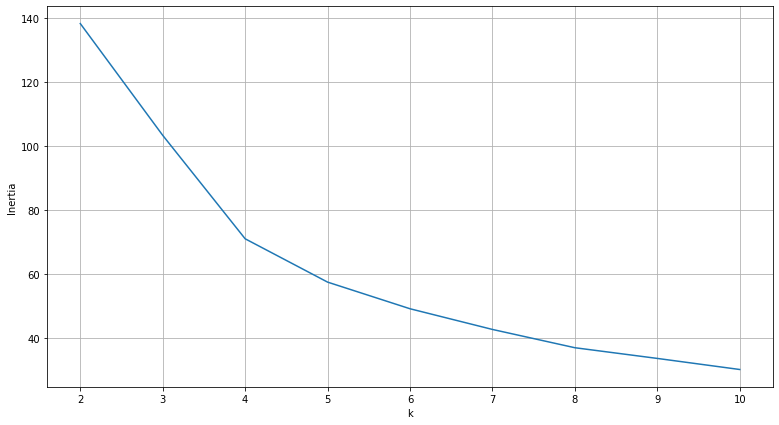

In [6]:
#create an empty dictionary for initeria/k values
inertias = {}
#create a loop to run the model with n-cluster values of 2 through 11 and calculate the inertia values
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(scaled_modeling_df)
    inertias[k] = kmeans.inertia_
#plot the inertia/k values in a line plot so major changes in inertia value can be seen
pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

In [7]:
#create the kmean clustering object
kmeans = KMeans(n_clusters=4, random_state=123)
#fit the kmeans model with the scaled dataset
kmeans.fit(scaled_modeling_df)
#use the model to create customer groups and add a column to the customer dataframe with the grouping values
customer_df['customer_cluster'] = kmeans.predict(scaled_modeling_df)

,recency,frequency,monetary,average_order_value,avg_items_ordered,unique_items_count,dist_rating,customer_cluster
CustomerID,,,,,,,,
12346.0,325,10,77183.60,77183.600000,74215.000000,1,0,1
12347.0,2,1820,4310.00,23.681319,13.505495,103,20,3
12348.0,75,310,1797.24,57.975484,75.516129,22,21,3
12349.0,18,730,1757.55,24.076027,8.643836,73,11,3
12350.0,310,170,334.40,19.670588,11.588235,17,13,1


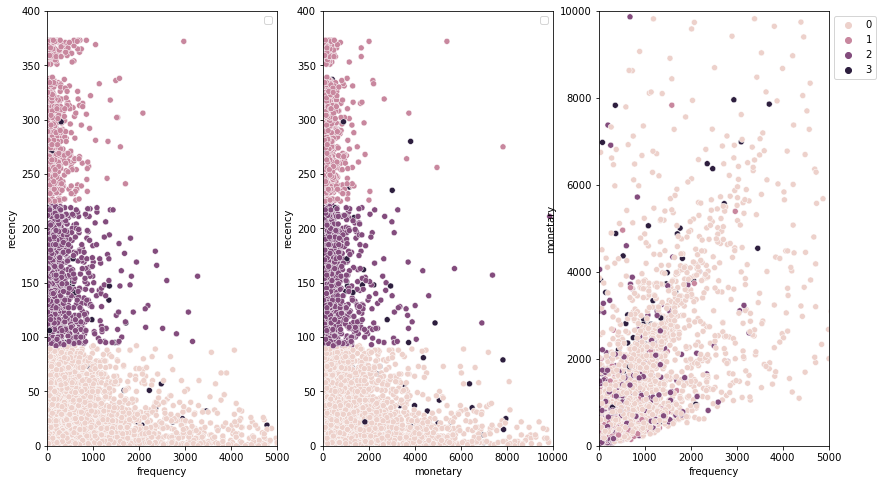

In [59]:
##plot the clusters##
#set a figure size for the plots
plt.figure(figsize=(14,8))
#create the first subplot
plt.subplot(131)
#create the scatterplot
sns.scatterplot(data=customer_df, y='recency', x='frequency', hue='customer_cluster')
plt.xlim(0, 5000)
plt.ylim(0, 400)
plt.legend('')
#create the second subplot
plt.subplot(132)
#create the scatterplot
sns.scatterplot(data=customer_df, y='recency', x='monetary', hue='customer_cluster')
plt.xlim(0, 10000)
plt.ylim(0, 400)
plt.legend('')
#create the third subplot
plt.subplot(133)
#create the scatterplot
sns.scatterplot(data=customer_df, y='monetary', x='frequency', hue='customer_cluster')
plt.xlim(0, 5000)
plt.ylim(0, 10000)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

---

### Understanding the Characteristics of the Customer Groups
- After creating the customer groups with the clustering model, review and analysis was completed to provide insight on the individual groups. 

- The customer dataframe was reshaped to group the data by customer group and includes the mean feature values for each customer group

- The table below shows the customer group characteristics and can be exported as needed for use across departments within the company

- Each feature column is plotted with a bar plot below for easy visual comparison. Note that for the recency variable a lower value is better and for the other features a higher value is better. The plots are arranged with the three primary features (recency, frequency, monetary) in the top row and the secondary features (average order value, average items ordered, number of unique items) in the second row.


In [11]:
#reshape the dataframe using a .groupby for the customer cluster and agregating by the mean value for each feature
customer_group_characteristics = customer_df.groupby('customer_cluster')[['recency', 'frequency', 'monetary', 
                                         'average_order_value', 'avg_items_ordered', 'unique_items_count']].mean()
#view the resulting dataframe
customer_group_characteristics

,recency,frequency,monetary,average_order_value,avg_items_ordered,unique_items_count
customer_cluster,,,,,,
0,31.468237,1215.413990,2662.540354,50.752697,32.595141,78.266238
1,294.318182,237.126623,599.064594,166.015033,140.868192,21.750000
2,153.086118,405.578406,783.723986,57.345503,33.244287,34.580977
3,75.475524,783.496503,3302.159301,50.912183,28.326722,60.776224


<AxesSubplot:xlabel='customer_cluster', ylabel='unique_items_count'>

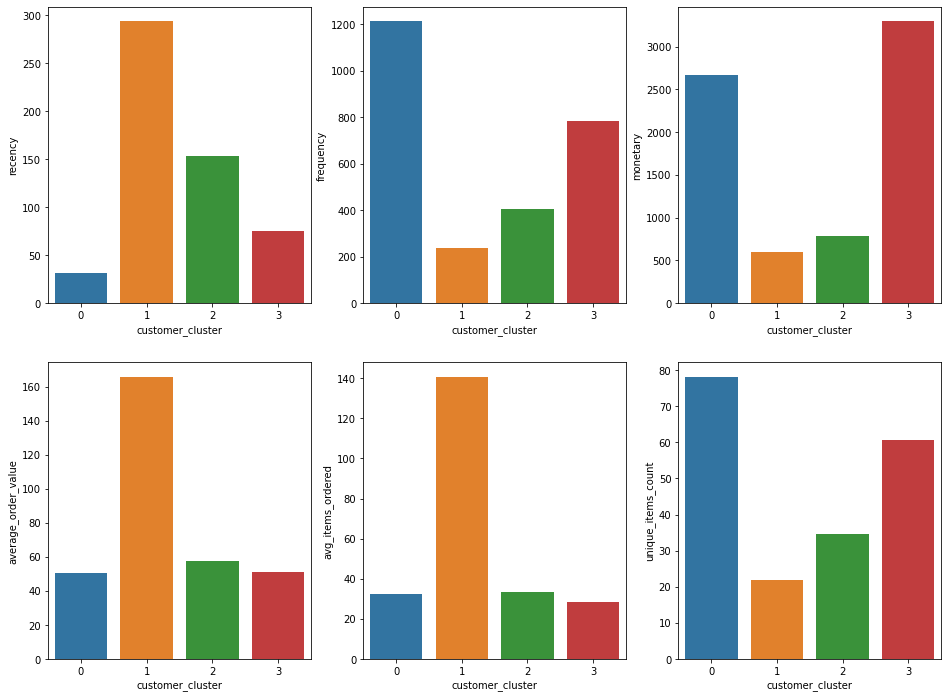

In [45]:
##plot the customer group characteristics##
##create the figure and assign a figure size
plt.figure(figsize=(16,12))
#create the first subplot
plt.subplot(231)
#create the bar plot
sns.barplot(data=plot_df, x='customer_cluster', y='recency', ci=None)
#create the second subplot
plt.subplot(232)
#create the bar plot
sns.barplot(data=plot_df, x='customer_cluster', y='frequency', ci=None)
#create the third subplot
plt.subplot(233)
#create the bar plot
sns.barplot(data=plot_df, x='customer_cluster', y='monetary', ci=None)
#create the fourth subplot
plt.subplot(234)
#create the bar plot
sns.barplot(data=plot_df, x='customer_cluster', y='average_order_value', ci=None)
#create the fifth subplot
plt.subplot(235)
#create the bar plot
sns.barplot(data=plot_df, x='customer_cluster', y='avg_items_ordered', ci=None)
#create the sixth subplot
plt.subplot(236)
#create the bar plot
sns.barplot(data=plot_df, x='customer_cluster', y='unique_items_count', ci=None)

---

### Data Breakdwn by Customer
- Now that we have more knowledge about the customer groups, strategies for marketing, customer retension, etc, can bea appied to individual customer and fine tuned using the information in the customer characteristics table seen below. 

- The below notebok cell is only showing the first five rows for reference but the complete table can be exported for use by departmets within the company.

In [28]:
#view the customer characteristics dataframe created above after clustering modeling
customer_df.head()

,recency,frequency,monetary,average_order_value,avg_items_ordered,unique_items_count,dist_rating,customer_cluster
CustomerID,,,,,,,,
12346.0,325,10,77183.60,77183.600000,74215.000000,1,0,1
12347.0,2,1820,4310.00,23.681319,13.505495,103,20,3
12348.0,75,310,1797.24,57.975484,75.516129,22,21,3
12349.0,18,730,1757.55,24.076027,8.643836,73,11,3
12350.0,310,170,334.40,19.670588,11.588235,17,13,1


---

### Summary
- 